# SVM (Support Vector Machine)  

Support Vector Machine merupakan salah satu model Machine Learning yang dapat digunakan untuk:
* Klasifikasi linear dan non linear
* Regresi
* Outlier Detection  

Kata kunci dari SVM adalah _decision boundary_, _support vector_, dan _margin_. Support vector merupaka dua data poin dari dua kelas (misal pada klasifikasi biner) yang memiliki jarak paling dekat. Margin, yang dapat dianggap sebagai jalan yang memisahkan support vector, akan dipilih yang memiliki nilai (lebar jalan) yang terlebar oleh SVM.  

Sumber lain yang berkaitan dengan SVM:
* [SVM kernel functions](https://data-flair.training/blogs/svm-kernel-functions/)

**Objektif:** Membuat model yang dapat memprediksi/mengklasifikasikan apakah sesorang terkena diabates atau tidak dari fitur(feature)-fitur yang diberikan.

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [34]:
# load the data
data = pd.read_csv('data/diabetes.csv')

In [3]:
# getting to know the data
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
X = data.drop(columns=['Outcome'])
y = data['Outcome']

In [7]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


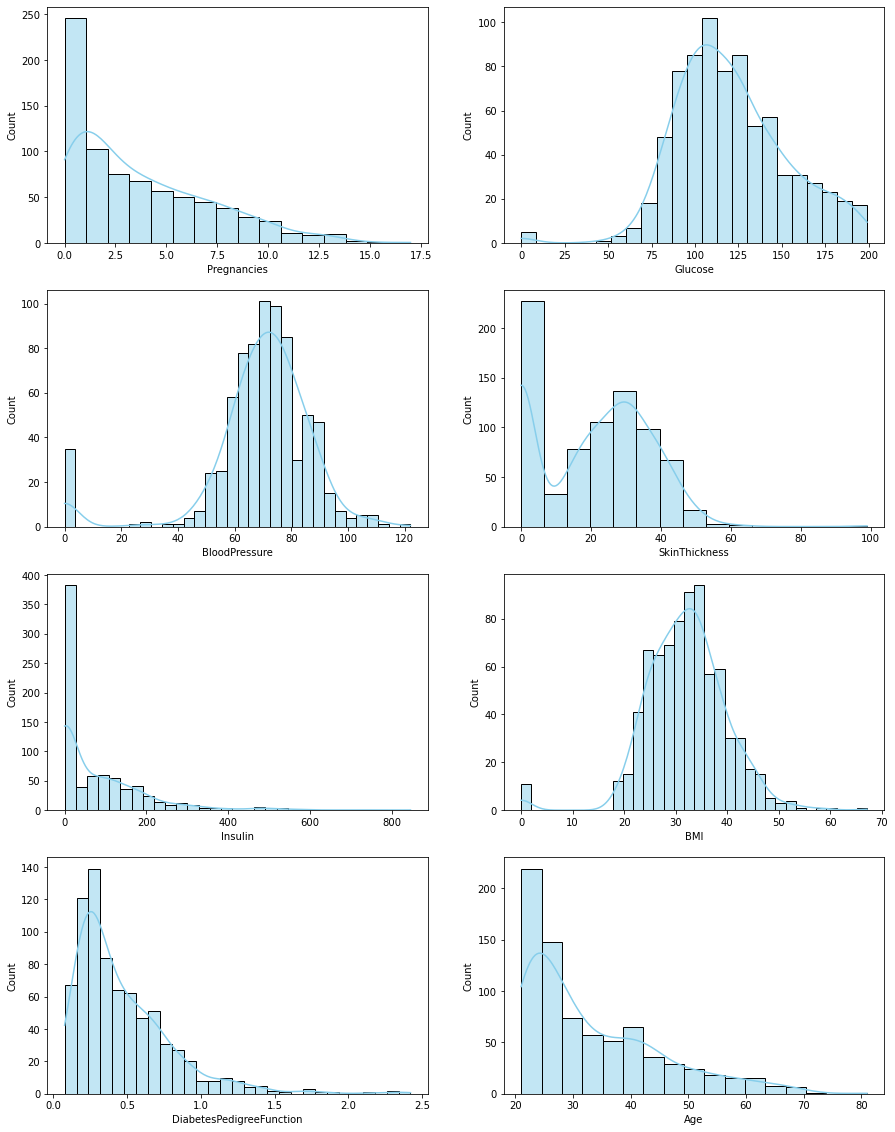

In [12]:
# visualize the data
fig, axes = plt.subplots(4, 2, figsize=(15, 20), sharex=False)
for ax, column in zip(axes.flat, X.columns):
    sns.histplot(X[column], kde=True, color="skyblue", ax=ax)

Dari visualisasi di atas, timbul pertanyaan adanya _peak_ pada nilai yang mendekati 0 pada kolom Insulin, BMI, SkinThickness, BloodPressure, dan Glucose. Apakah nilai tersebut memungkinkah pada kasus sebenarnya? ataukah outlier?

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

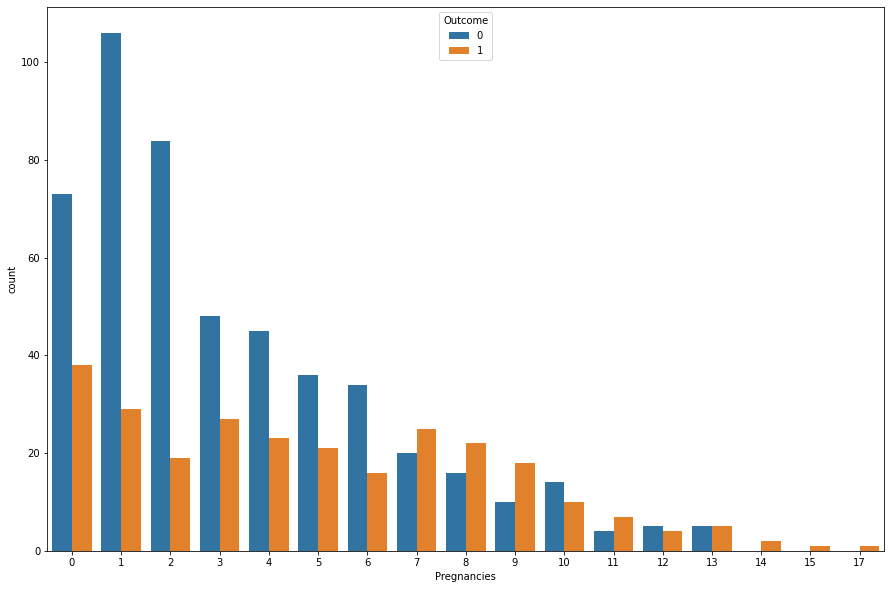

In [17]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Pregnancies', data=data, hue='Outcome')

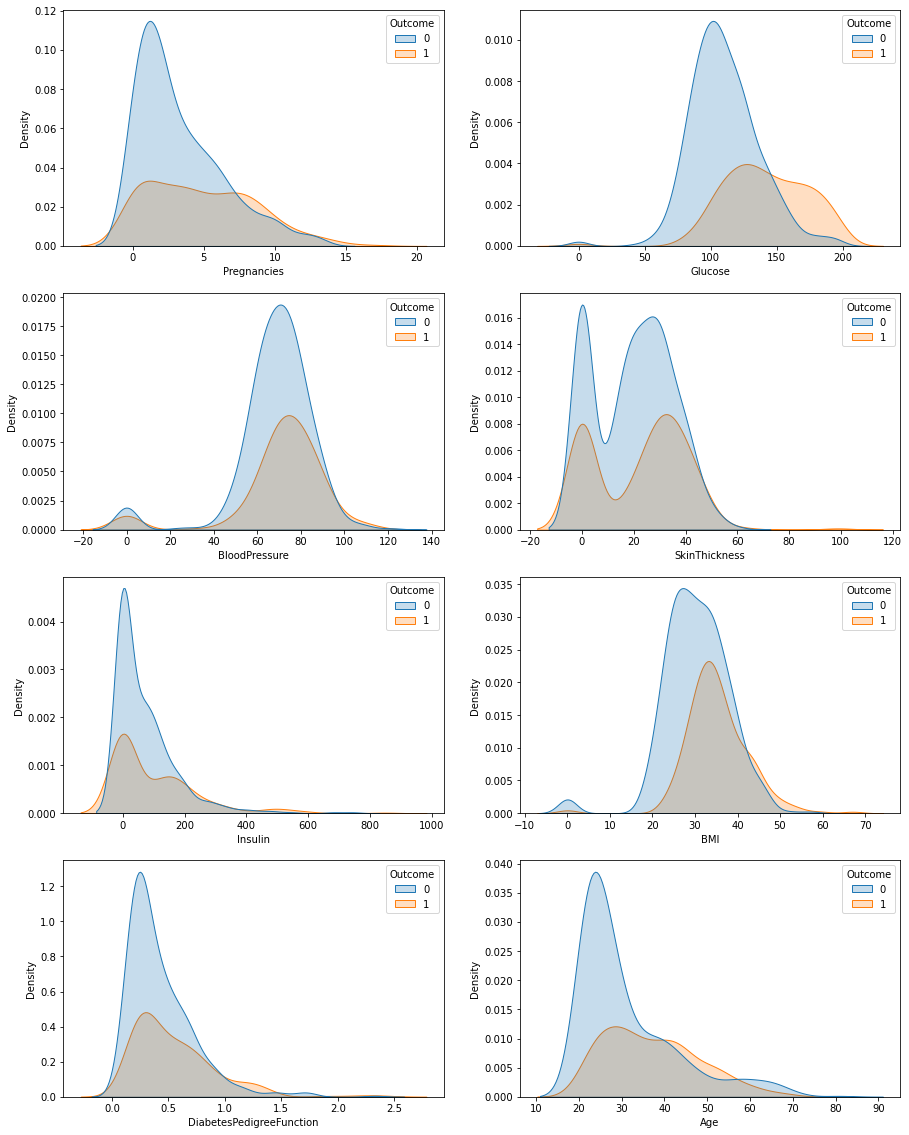

In [23]:
fig, axes = plt.subplots(4, 2, figsize=(15, 20), sharex=False)
for ax, column, in zip(axes.flat, X.columns):
    sns.kdeplot(data=data, x=column, hue='Outcome', fill=True, ax=ax)

Selanjutnya kita akan melakukan normalisasi agar setiap fitur memiliki range yang sama, perbedaan range yang tinggi dapat menyebabkan bias. Tidak seperti pada contoh dari materi yang menggunakan StandardScaler, saya menggunakan MinMax. Karena SatndardScaler digunakan untuk data yang terdistribusi normal. Jika ingin menggunakannya maka perlu mentransformasi agar terdistribusi normal.

https://stackoverflow.com/questions/35723472/how-to-use-sklearn-fit-transform-with-pandas-and-return-dataframe-instead-of-num Hasil fit transform menjadi dataframe

In [27]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X.values)
X_scaled = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)

In [28]:
X_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


In [30]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [35]:
# train model
clf = SVC()
clf.fit(X_train, y_train)

SVC()

In [36]:
# evaluate model
clf.score(X_test, y_test)

0.7467532467532467

In [38]:
y_pred = clf.predict(X_test)

In [41]:
# label_names = ['diabetes', 'not diabetes']
confusion_matrix(y_test, y_pred)

array([[82, 17],
       [22, 33]], dtype=int64)

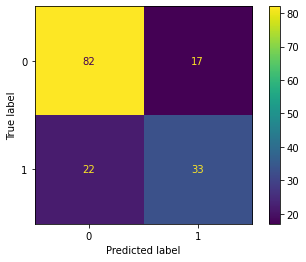

In [42]:
plot_confusion_matrix(clf, X_test, y_test)